Loading the Files

In [ ]:
from google.colab import files
uploaded=files.upload()

Importing Libraries


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
!pip install shap
import shap
import xgboost as xgb

Step 1: Load the Dataset

In [ ]:
df=pd.read_csv('creditcard.csv')
print(df.shape)  #it gives the shape in the form of [number of rows, number of columns]
# print(df.head)
print(df['Class'].value_counts())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


Step 2: Preprocessing

In [ ]:
scaler =StandardScaler()
df['Amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1)) #Standardise the values
df['Time']=scaler.fit_transform(df['Time'].values.reshape(-1,1)) #Standardise the values

# Drop rows with NaN in the 'Class' column
df.dropna(subset=['Class'], inplace=True)

X=df.drop('Class',axis=1)
y=df['Class']
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


Step 3 : Test-Train Split

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


Step 4 : Applying SMOTE (Only for Training Data)

In [ ]:
smote=SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(y_train.value_counts())
print(y_train_res.value_counts())

Class
0    227451
1       394
Name: count, dtype: int64
Class
0    227451
1    227451
Name: count, dtype: int64


Step 5 : Training using Random Forest

In [ ]:
model = xgb.XGBClassifier(n_estimators=200,random_state=42,max_depth=6,learning_rate=0.1,n_jobs=-1,
                          scale_pos_weight=len(y_train_res[y_train_res==0])/len(y_train_res[y_train_res==1]),)
model.fit(X_train_res,y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=-1, num_parallel_tree=None, ...)

Step 6: Prediction

In [ ]:
y_pred=model.predict(X_test) #to predict labels on unseen data
y_proba=model.predict_proba(X_test)[:,1]

Step 7 : Evaluation

In [ ]:
roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)

ROC-AUC: 0.9768807494860634
PR-AUC: 0.8618001563259898


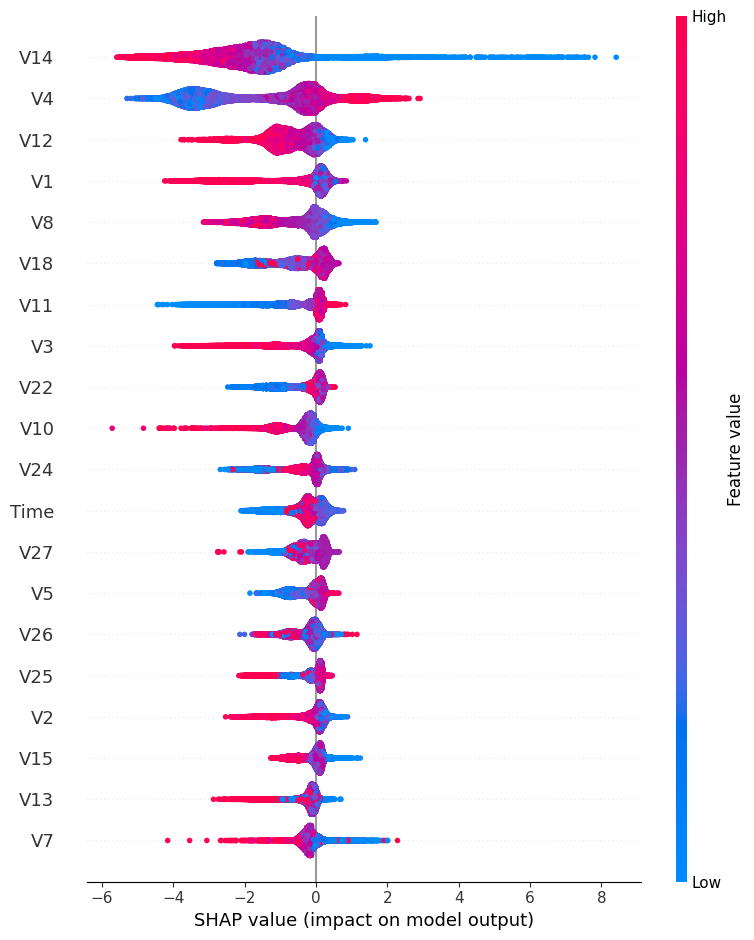

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Step 9 : Downloading


In [ ]:
import joblib
joblib.dump(model,'Credit_Card_model.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(shap_values,'shap_values.pkl')

['shap_values.pkl']

In [ ]:
from google.colab import files
files.download('Credit_Card_model.pkl')
files.download('scaler.pkl')
files.download('shap_values.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>